## Linear discriminant analysis em R



In [1]:
# LDA

# Importing the dataset
dataset = read.csv('Wine.csv')


In [2]:
head(dataset,10)

Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1


In [3]:
# Splitting the dataset into the Training set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(dataset$Customer_Segment, SplitRatio = 0.8)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

In [4]:
head(training_set,10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
6,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
7,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
9,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
10,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1
12,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280,1
13,13.75,1.73,2.41,16.0,89,2.60,2.76,0.29,1.81,5.60,1.15,2.90,1320,1
14,14.75,1.73,2.39,11.4,91,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150,1


In [5]:
head(test_set,10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
8,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
11,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510,1
16,13.63,1.81,2.70,17.2,112,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310,1
20,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845,1
21,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780,1
24,12.85,1.60,2.52,17.8,95,2.48,2.37,0.26,1.46,3.93,1.09,3.63,1015,1
31,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285,1
32,13.58,1.66,2.36,19.1,106,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515,1


In [6]:
# Feature Scaling
training_set[-14] = scale(training_set[-14])
test_set[-14] = scale(test_set[-14])

In [7]:
head(training_set,10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
1,1.5207582,-0.55639963,0.23579171,-1.0905953,1.88706849,0.8113772,1.0287334,-0.6783993,1.20207483,0.26175076,0.3765715,1.8639715,1.066096,1
2,0.2326757,-0.49235827,-0.80604333,-2.3498893,0.03193501,0.5690562,0.7307323,-0.8411235,-0.57838135,-0.27972739,0.4197159,1.1205576,1.016522,1
3,0.1826530,0.03827019,1.09800002,-0.2319858,0.10064365,0.8113772,1.2075341,-0.5156752,2.11874534,0.27894054,0.3334272,0.7917399,1.462687,1
6,1.4832413,-0.51065580,0.30764240,-1.2050766,0.85643878,1.5706496,1.3565347,-0.1902268,0.63796990,0.73876722,0.4197159,0.3342544,2.338493,1
7,1.7208487,-0.41001937,0.30764240,-1.3767985,-0.24289959,0.3267352,0.4923314,-0.5156752,0.65559818,0.09415038,0.2902828,1.3778932,1.809705,1
9,2.2710976,-0.62044100,-0.69826729,-1.5485204,-0.17419094,0.8113772,0.9492665,-0.5970372,0.65559818,0.07266315,0.5491491,0.3342544,0.999997,1
10,1.0580490,-0.88575523,-0.33901383,-0.9761141,-0.10548229,1.1021624,1.1181338,-1.1665718,0.42643055,0.94074717,0.2471384,1.3350039,0.999997,1
12,1.3831960,-0.76682126,-0.15938710,-0.7471515,-0.31160823,-0.1579068,0.4029311,-0.8411235,-0.06716126,-0.01328576,0.9374486,0.2913651,1.776655,1
13,0.9204867,-0.53810210,0.16394102,-0.9761141,-0.72386012,0.4882825,0.7307323,-0.5970372,0.35591744,0.24456098,0.8511599,0.4057365,1.908853,1
14,2.1710523,-0.53810210,0.09209032,-2.2926486,-0.58644282,1.2960192,1.6545358,0.5420319,2.11874534,0.15861206,1.2826038,0.1626973,1.347015,1


In [8]:
head(test_set,10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
4,1.6381499,-0.3750461,0.47797940,-1.1382021,0.93433494,2.3677461,1.4693320,-0.8775001,1.1035523,1.13900491,-0.53366102,1.1262822,1.96727025,1
5,0.3363344,0.1489722,1.89279840,0.4406617,1.30973738,0.7794444,0.6538230,0.2588310,0.4988150,-0.36541823,0.29364123,0.4421809,-0.08118990,1
8,1.2810147,-0.2112904,0.89860126,-0.8374661,1.53497884,0.4769107,0.4703335,-0.3472123,-0.4586858,-0.04983522,0.38556370,1.2973075,1.45859223,1
11,1.3270967,-0.2031026,-0.28678764,-0.6870981,0.33369105,1.0063446,1.2960363,-1.0290109,1.4395175,0.25277863,1.25882718,0.7579199,2.04975858,1
16,0.7856335,-0.4896751,1.24274643,-0.9878341,0.85925446,0.8550778,0.8780880,-0.4229677,-0.1059224,0.92285216,1.39671089,0.3764019,1.49983639,1
20,0.7971540,0.5665493,0.70740950,-1.7396740,1.15957640,0.6281775,1.0004143,-1.4077879,0.2300428,-0.02821994,-0.07404866,1.0078800,0.22126730,1
21,1.2810147,-0.6370552,-0.36326434,-1.4389380,1.91038127,1.0819780,1.1431284,-0.8775001,0.9691662,0.20954808,0.52344741,1.4683328,0.04254259,1
24,-0.1129648,-0.6616186,0.55445610,-0.7622821,-0.41711381,0.2953905,0.3276194,-0.7259893,-0.1059224,-0.53401738,0.52344741,1.3630865,0.68870116,1
31,0.9008385,-0.7434964,1.24274643,1.0045416,0.03336911,1.0819780,1.2246793,-0.4987231,1.4395175,0.23116336,0.98305977,0.1527534,1.43109612,1
32,0.7280311,-0.6124919,-0.05735753,-0.2735862,0.40877154,0.8702045,1.1635161,-1.0290109,0.7171923,0.74992996,0.52344741,0.3764019,2.06350664,1


In [9]:
# Applying LDA
library(MASS)


In [10]:
lda = lda(formula = Customer_Segment ~ ., data = training_set)
lda

Call:
lda(Customer_Segment ~ ., data = training_set)

Prior probabilities of groups:
        1         2         3 
0.3309859 0.4014085 0.2676056 

Group means:
     Alcohol Malic_Acid        Ash Ash_Alcanity   Magnesium Total_Phenols
1  0.9143669 -0.2653910  0.2740102   -0.7453247  0.39009710    0.83200023
2 -0.8840575 -0.3061728 -0.3932170    0.2259393 -0.28508911   -0.05219252
3  0.1951587  0.7875060  0.2509182    0.5829401 -0.05485487   -0.95076414
   Flavanoids Nonflavanoid_Phenols Proanthocyanins Color_Intensity        Hue
1  0.92305929          -0.53991068      0.51457195       0.1510230  0.4555166
2  0.07478132          -0.07175223      0.08097814      -0.8332685  0.4330377
3 -1.25385058           0.77541260     -0.75791146       1.0631113 -1.2129587
       OD280    Proline
1  0.7628428  1.1685484
2  0.2339286 -0.7100428
3 -1.2944091 -0.3802457

Coefficients of linear discriminants:
                              LD1          LD2
Alcohol              -0.382175608  0.727717195
Ma

In [16]:
training_set = as.data.frame(predict(lda, training_set))


ERROR: Error in eval(predvars, data, env): objeto 'Alcohol' não encontrado


In [17]:
head(training_set,10)

,class,posterior.1,posterior.2,posterior.3,x.LD1,x.LD2
1,1,1.0000000,1.402325e-09,5.656888e-17,-4.656187,2.081444
2,1,0.9999999,1.142655e-07,5.546095e-16,-4.336729,1.267238
3,1,0.9999936,6.408747e-06,1.321058e-12,-3.292202,1.167575
6,1,1.0000000,1.901419e-11,1.858141e-16,-4.515987,3.265418
7,1,1.0000000,8.480654e-12,8.206972e-17,-4.627289,3.369602
9,1,1.0000000,2.703595e-08,1.193997e-14,-3.936469,1.967177
10,1,0.9999998,2.142528e-07,3.768622e-13,-3.471632,1.854086
12,1,0.9999999,5.102328e-08,2.029228e-13,-3.559224,2.133805
13,1,1.0000000,2.096652e-08,6.269208e-14,-3.718128,2.217412
14,1,1.0000000,1.730550e-10,1.554549e-19,-5.444501,1.922478


In [18]:
#preciso ordenar as variáveis de modo correto
training_set = training_set[c(5, 6, 1)]


In [19]:
head(training_set,10)

,x.LD1,x.LD2,class
1,-4.656187,2.081444,1
2,-4.336729,1.267238,1
3,-3.292202,1.167575,1
6,-4.515987,3.265418,1
7,-4.627289,3.369602,1
9,-3.936469,1.967177,1
10,-3.471632,1.854086,1
12,-3.559224,2.133805,1
13,-3.718128,2.217412,1
14,-5.444501,1.922478,1


In [20]:
test_set = as.data.frame(predict(lda, test_set))



In [21]:
head(test_set,10)

,class,posterior.1,posterior.2,posterior.3,x.LD1,x.LD2
4,1,1.0000000,6.901624e-12,4.696904e-15,-4.092791,3.8792015
5,1,0.8113902,1.886059e-01,3.890313e-06,-1.252520,0.3211870
8,1,1.0000000,3.382810e-10,9.499796e-15,-3.984139,3.0098153
11,1,1.0000000,1.013939e-08,7.042600e-17,-4.619335,1.6237834
16,1,1.0000000,2.336029e-08,6.833553e-12,-3.097161,2.7235151
20,1,0.9999998,2.368751e-07,5.948939e-13,-3.410850,1.8814164
21,1,0.9999877,1.228429e-05,8.347561e-14,-3.654900,0.6954250
24,1,0.9998196,1.804402e-04,1.671676e-11,-2.943195,0.6415029
31,1,0.9994783,5.216505e-04,3.241139e-10,-2.546780,0.7190155
32,1,0.9999997,2.502726e-07,5.649547e-13,-3.417461,1.8621361


In [22]:
test_set = test_set[c(5, 6, 1)]


In [23]:
head(test_set,10)

,x.LD1,x.LD2,class
4,-4.092791,3.8792015,1
5,-1.252520,0.3211870,1
8,-3.984139,3.0098153,1
11,-4.619335,1.6237834,1
16,-3.097161,2.7235151,1
20,-3.410850,1.8814164,1
21,-3.654900,0.6954250,1
24,-2.943195,0.6415029,1
31,-2.546780,0.7190155,1
32,-3.417461,1.8621361,1


In [24]:
# Fitting SVM to the Training set
# install.packages('e1071')
library(e1071)

In [25]:
classifier = svm(formula = class ~ .,
                 data = training_set,
                 type = 'C-classification',
                 kernel = 'linear')


In [26]:
classifier


Call:
svm(formula = class ~ ., data = training_set, type = "C-classification", 
    kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  19


In [27]:
# Predicting the Test set results
y_pred = predict(classifier, newdata = test_set[-3])


In [28]:
# Making the Confusion Matrix
cm = table(test_set[, 3], y_pred)
cm

   y_pred
     1  2  3
  1 12  0  0
  2  1 13  0
  3  0  0 10

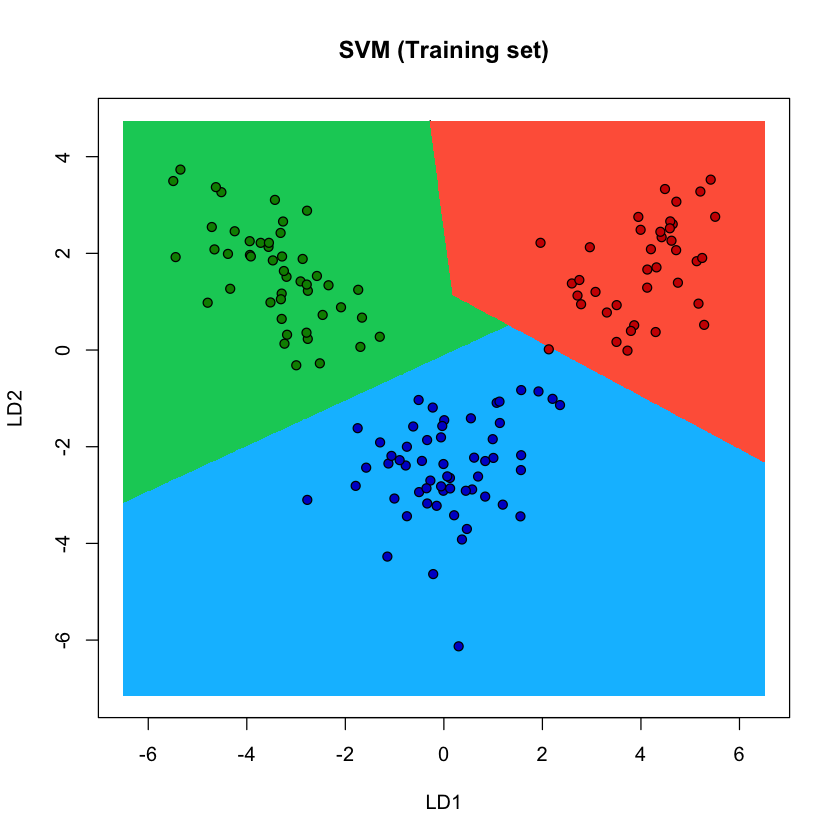

In [29]:
# Visualising the Training set results
library(ElemStatLearn)
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('x.LD1', 'x.LD2')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3],
     main = 'SVM (Training set)',
     xlab = 'LD1', ylab = 'LD2',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 2, 'deepskyblue', ifelse(y_grid == 1, 'springgreen3', 'tomato')))
points(set, pch = 21, bg = ifelse(set[, 3] == 2, 'blue3', ifelse(set[, 3] == 1, 'green4', 'red3')))


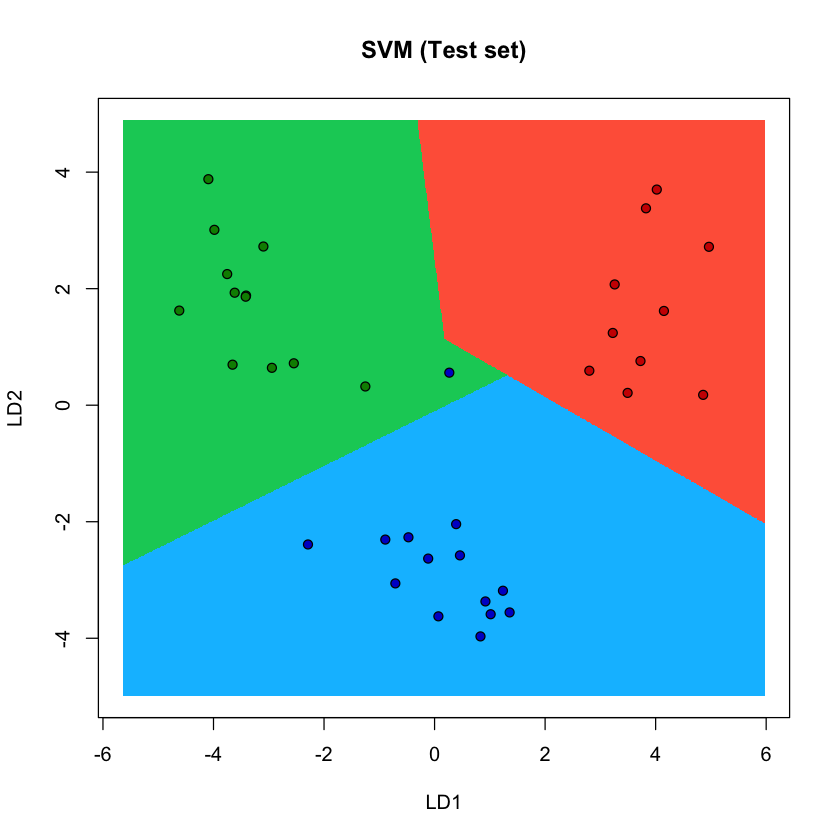

In [30]:
# Visualising the Test set results
library(ElemStatLearn)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('x.LD1', 'x.LD2')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3], main = 'SVM (Test set)',
     xlab = 'LD1', ylab = 'LD2',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 2, 'deepskyblue', ifelse(y_grid == 1, 'springgreen3', 'tomato')))
points(set, pch = 21, bg = ifelse(set[, 3] == 2, 'blue3', ifelse(set[, 3] == 1, 'green4', 'red3')))